# 4章データの表現と特徴量エンジニアリング

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import mglearn

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=100)

X.shape

(100, 1)

In [9]:
X, y

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
X_poly.shape

(100, 10)

In [11]:
X_poly[:6]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [12]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

In [13]:
poly.degree

10

In [14]:
poly.get_params()

{'degree': 10, 'include_bias': False, 'interaction_only': False}

# 4.4 単変量非線形変換

In [20]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w= rnd.normal(size=3)

In [17]:
X_org[:6]

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826]])

In [18]:
X_org.shape

(1000, 3)

In [23]:
w

array([ 1.59327362,  0.5687224 , -0.11448705])

In [27]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
X[:6], y[:6]

(array([[54, 17, 38],
        [98, 73,  3],
        [26,  6,  7],
        [11, 12, 32],
        [24, 12, 16],
        [ 8, 42, 11]]),
 array([2.92614361, 4.74436373, 1.4394878 , 0.56962109, 1.23092405,
        1.4048387 ]))

In [28]:
np.bincount(X[:, 0])

array([17, 48, 44, 76, 51, 61, 51, 46, 44, 40, 33, 34, 32, 31, 30, 33, 20,
       22, 16, 19, 25, 14, 15,  8, 13,  8, 11,  9,  9,  4,  7,  8,  5,  8,
        7,  4,  5,  1,  4,  0,  3,  4,  7,  1,  3,  4,  4,  6,  5,  4,  1,
        1,  3,  1,  1,  2,  3,  2,  2,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  2,  2,  0,  1,  2,  2,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  2,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1])

Text(0.5,0,'Value')

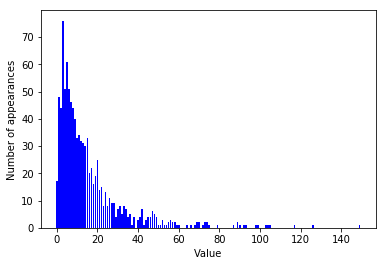

In [42]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

# 4.5 自動特徴量選択

# 4.5.1 単変量統計

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer.data.shape)

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
print(len(cancer.data))
print(noise.shape)

X_w_noise = np.hstack([cancer.data, noise])
print(X_w_noise.shape)
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0,
                                                   test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_train_selected.shape

(569, 30)
569
(569, 50)
(569, 80)


(284, 40)

In [61]:
mask = select.get_support()
mask.shape

(80,)

In [63]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

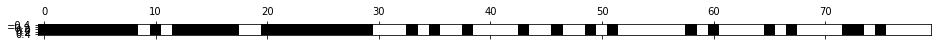

In [64]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [65]:
mask.reshape(1,-1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False,  True, False,  True,
        False, False,  True, False, False, False, False,  True, False,
        False,  True, False, False,  True, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True,  True, False,  True, False, False, False, False]])

In [69]:
mask.reshape(-1, 1)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [